In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

SAVE_PLOTS=True
STANDARD_DPI=300

In [9]:
noise_data = pd.read_csv('data\dark_pmt\I_V_noise_700_2285V.csv')
noise_data.head(1)

,time,pmt_high_voltage,pmt_current,v_p2p_ch1,v_rms_ch1,v_p2p_ch2,v_rms_ch2
0,1.741440e+09,700.1,67.78,0.04,0.010568,0.0408,0.012731


C:\Users\tobif\AppData\Local\Temp\ipykernel_13412\2330216340.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks()*1e6)


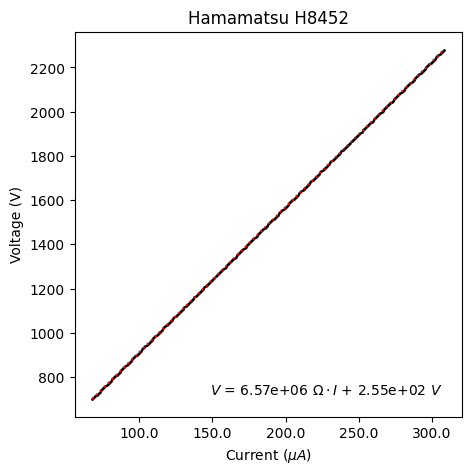

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))
V = noise_data['pmt_high_voltage']
I = noise_data['pmt_current']/1e6  # Convert to amperes

# fit a line to V and I, display the line as a dotted red line and show on screen the constants of the line, rounded to two decimal places in scientific notation in the bottom right corner of the plot. Keep in mind that the current is in microamperes and the line fit must be in amperes so that the slope is in ohms.
m, b = np.polyfit(I, V, 1)
ax.plot(I, m*I + b, color='red', linestyle='dotted')
ax.text(0.95, 0.05, f'$V$ = {m:.2e} $\Omega \cdot I$ + {b:.2e} $V $', ha='right', va='bottom' , transform=ax.transAxes, color='black')

# current is in amperes, rescale the x axis ticks to microamperes
ax.set_xticklabels(ax.get_xticks()*1e6)

ax.scatter(I, V, color='black', s=1)
ax.set_xlabel(f'Current $(\mu A)$')
ax.set_ylabel('Voltage (V)')
ax.set_title('Hamamatsu H8452')

if SAVE_PLOTS:
    plt.savefig('plots\pmt_noise_tests\pmt1\I_V_characteristic_and_fit.jpg', dpi=STANDARD_DPI, bbox_inches='tight')

plt.show()

In [11]:

noise_data['V_set'] = noise_data['pmt_high_voltage'].round()
noise_data.head() 

,time,pmt_high_voltage,pmt_current,v_p2p_ch1,v_rms_ch1,v_p2p_ch2,v_rms_ch2,V_set
0,1.741440e+09,700.1,67.780,0.0400,0.010568,0.0408,0.012731,700.0
1,1.741440e+09,705.1,68.495,0.0424,0.011586,0.0424,0.011411,705.0
2,1.741440e+09,710.1,69.305,0.0448,0.012768,0.0408,0.011308,710.0
3,1.741440e+09,715.1,70.055,0.0408,0.011300,0.0400,0.009989,715.0
4,1.741440e+09,719.8,70.820,0.0448,0.010078,0.0416,0.012973,720.0


# Characteristics of power supply

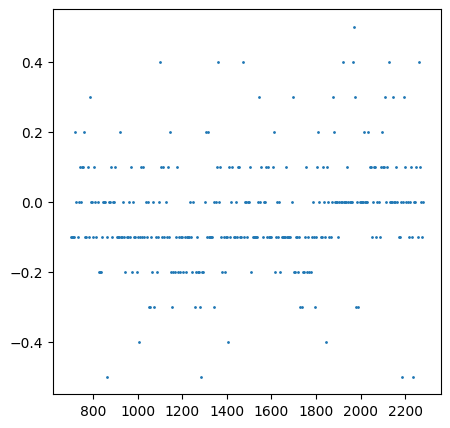

In [ ]:
v_delta = noise_data['V_set'] - noise_data['pmt_high_voltage']
fig, ax= plt.subplots(figsize=(5,5))
ax.scatter(noise_data['V_set'], v_delta, s=1)